In [87]:
# https://people.duke.edu/~ccc14/sta-663/BlackBoxOptimization.html

In [88]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')
import scipy.linalg as la

In [89]:
def f(x):
    return x**3-3*x+1

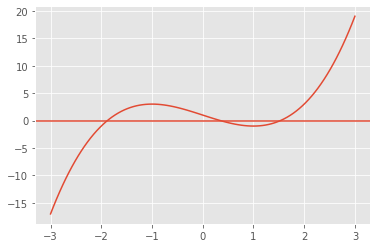

In [90]:
x = np.linspace(-3,3,100)
plt.axhline(0)
plt.plot(x, f(x));

In [91]:
from scipy.optimize import brentq, newton
brentq(f, -3, 0), brentq(f, 0, 1), brentq(f, 1,3)

(-1.8794, 0.3473, 1.5321)

In [92]:
newton(f, -3), newton(f, 0), newton(f, 3)

(-1.8794, 0.3473, 1.5321)

In [93]:
from scipy.optimize import fixed_point
def f(x, r):
    """Discrete logistic equation."""
    return r*x*(1-x)

In [94]:
n = 100
fps = np.zeros(n)
for i, r in enumerate(np.linspace(0, 4, n)):
    fps[i] = fixed_point(f, 0.5, args=(r, ))

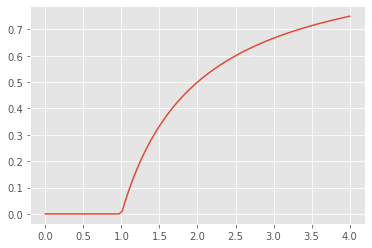

In [95]:
plt.plot(np.linspace(0, 4, n), fps);

Mutlivariate roots and fixed points

In [96]:
from scipy.optimize import root, fsolve

In [97]:
def f(x):
    return [x[1] - 3*x[0]*(x[0]+1)*(x[0]-1),
            .25*x[0]**2 + x[1]**2 - 1]

In [98]:
sol = root(f, (0.5, 0.5))
sol

    fjac: array([[-0.9978,  0.0659],
       [-0.0659, -0.9978]])
     fun: array([-1.6360e-12,  1.6187e-12])
 message: 'The solution converged.'
    nfev: 21
     qtf: array([-1.4947e-08,  1.2702e-08])
       r: array([ 8.2295, -0.8826, -1.7265])
  status: 1
 success: True
       x: array([1.1169, 0.8295])

In [99]:
f(sol.x)

[-0.0000, 0.0000]

In [100]:
sol = root(f, (12,12))
sol

    fjac: array([[ 0.2205, -0.9754],
       [ 0.9754,  0.2205]])
     fun: array([4.7062e-13, 1.4342e-10])
 message: 'The solution converged.'
    nfev: 33
     qtf: array([-1.5296e-08,  3.5475e-09])
       r: array([-10.9489,   6.1687,  -0.3835])
  status: 1
 success: True
       x: array([ 0.778 , -0.9212])

In [101]:
f(sol.x)

[0.0000, 0.0000]

Gradient deescent

In [102]:
def rosen_der(x):
    """Derivative of generalized Rosen function."""
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

In [103]:
def custmin(fun, x0, args=(), maxfev=None, alpha=0.0002,
        maxiter=100000, tol=1e-10, callback=None, **options):
    """Implements simple gradient descent for the Rosen function."""
    bestx = x0
    besty = fun(x0)
    funcalls = 1
    niter = 0
    improved = True
    stop = False

    while improved and not stop and niter < maxiter:
        niter += 1
        # the next 2 lines are gradient descent
        step = alpha * rosen_der(bestx)
        bestx = bestx - step

        besty = fun(bestx)
        funcalls += 1

        if la.norm(step) < tol:
            improved = False
        if callback is not None:
            callback(bestx)
        if maxfev is not None and funcalls >= maxfev:
            stop = True
            break

    return opt.OptimizeResult(fun=besty, x=bestx, nit=niter,
                              nfev=funcalls, success=(niter > 1))

In [104]:
def reporter(p):
    """Reporter function to capture intermediate states of optimization."""
    global ps
    ps.append(p)

In [105]:
# Initial starting position
x0 = np.array([4,-4.1])

In [106]:
from scipy import optimize as opt

In [107]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))

In [108]:
def rosen(x):
    """Generalized n-dimensional version of the Rosenbrock function"""
    return sum(100*(x[1:]-x[:-1]**2.0)**2.0 +(1-x[:-1])**2.0)

In [109]:
ps = [x0]
opt.minimize(rosen, x0, method=custmin, callback=reporter)

     fun: 1.060466347344834e-08
    nfev: 100001
     nit: 100000
 success: True
       x: array([0.9999, 0.9998])

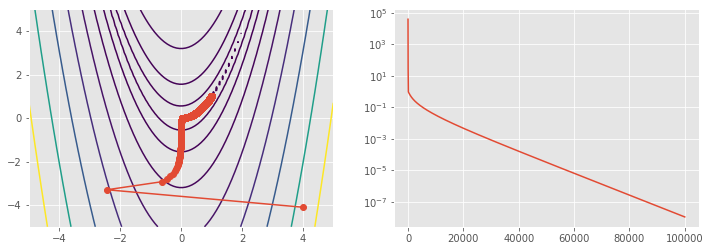

In [110]:
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5)
plt.plot(ps[:, 0], ps[:, 1], '-o')
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T))

Newton’s method and variants

In [111]:
from scipy.optimize import rosen, rosen_der, rosen_hess

In [112]:
ps = [x0]
opt.minimize(rosen, x0, method='Newton-CG', jac=rosen_der, hess=rosen_hess, callback=reporter)

     fun: 1.3642782750354208e-13
     jac: array([ 1.212e-04, -6.085e-05])
 message: 'Optimization terminated successfully.'
    nfev: 38
    nhev: 26
     nit: 26
    njev: 63
  status: 0
 success: True
       x: array([1., 1.])

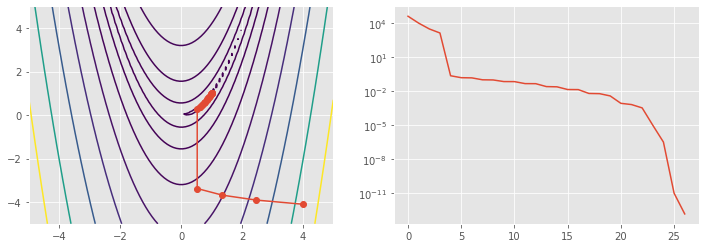

In [113]:
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5)
plt.plot(ps[:, 0], ps[:, 1], '-o')
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T));

In [114]:
ps = [x0]
opt.minimize(rosen, x0, method='BFGS', callback=reporter)

      fun: 4.4101876143268287e-13
 hess_inv: array([[0.5   , 1.0001],
       [1.0001, 2.0053]])
      jac: array([ 1.5620e-05, -3.9382e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 588
      nit: 54
     njev: 144
   status: 2
  success: False
        x: array([1., 1.])

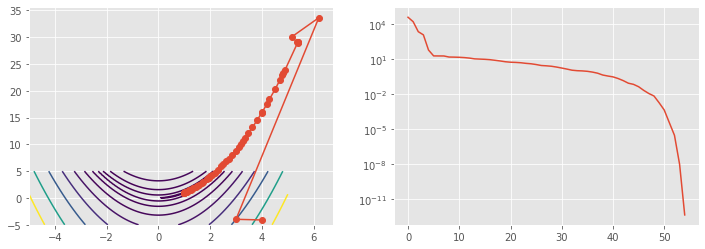

In [115]:
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5)
plt.plot(ps[:, 0], ps[:, 1], '-o')
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T));

In [116]:
ps = [x0]
opt.minimize(rosen, x0, method='nelder-mead', callback=reporter)

 final_simplex: (array([[1.    , 1.    ],
       [0.9999, 0.9999],
       [1.    , 1.    ]]), array([5.2628e-10, 3.8753e-09, 1.0609e-08]))
           fun: 5.262756878429089e-10
       message: 'Optimization terminated successfully.'
          nfev: 162
           nit: 85
        status: 0
       success: True
             x: array([1., 1.])

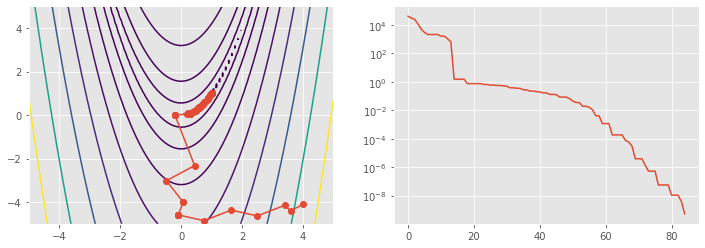

In [117]:
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5)
plt.plot(ps[:, 0], ps[:, 1], '-o')
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T));